<a href="https://colab.research.google.com/github/RakshitAcharya/Tomato-Leaf-Disease-Classification/blob/main/Tomato_Leaf_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 40kB/s 


# IMPORTING DATA

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/DATASETS/tomato leaf disease/train"
valid_path = '/content/drive/MyDrive/DATASETS/tomato leaf disease/valid'

# INCEPTION MODEL

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3],
                        weights='imagenet', 
                        include_top=False) 

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/drive/MyDrive/DATASETS/tomato leaf disease/train/*')

In [ ]:
len(folders)  # used for finding the number of output neurons

10

# MODEL BUILDING

In [ ]:
x = tf.keras.layers.Flatten()(inception.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# IMAGE DATA GENERATOR

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale=1/255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
testing_set = train_datagen.flow_from_directory(valid_path,
                                                target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
                                                

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# MODEL FIT

In [ ]:
history = model.fit(
  training_set,
  validation_data=testing_set,
  epochs=20,
)

Epoch 1/20
1147/1147 [==============================] - 294s 256ms/step - loss: 1.2369 - accuracy: 0.6782 - val_loss: 1.0109 - val_accuracy: 0.7470
Epoch 2/20
1147/1147 [==============================] - 298s 259ms/step - loss: 1.2502 - accuracy: 0.6722 - val_loss: 1.0211 - val_accuracy: 0.7213
Epoch 3/20
1147/1147 [==============================] - 297s 259ms/step - loss: 1.3192 - accuracy: 0.6734 - val_loss: 1.1410 - val_accuracy: 0.7424
Epoch 4/20
1147/1147 [==============================] - 297s 259ms/step - loss: 1.2869 - accuracy: 0.6772 - val_loss: 0.9901 - val_accuracy: 0.7315
Epoch 5/20
1147/1147 [==============================] - 294s 257ms/step - loss: 1.2631 - accuracy: 0.6680 - val_loss: 1.1207 - val_accuracy: 0.7422
Epoch 6/20
1147/1147 [==============================] - 295s 257ms/step - loss: 1.3262 - accuracy: 0.6649 - val_loss: 1.1560 - val_accuracy: 0.6936
Epoch 7/20
1147/1147 [==============================] - 294s 256ms/step - loss: 1.3440 - accuracy: 0.6663 - val_

# VISUALIZING THE RESULTS

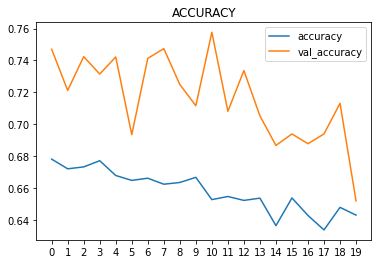

In [ ]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

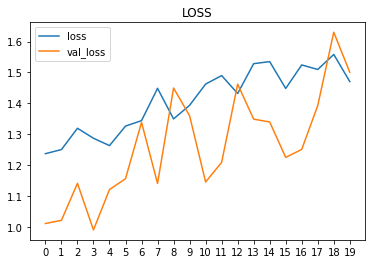

In [ ]:

loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [ ]:
import os.path

In [ ]:
if os.path.isfile("/content/drive/MyDrive/DATASETS/leaf_prediction_model.h5") is False:
  model.save("/content/drive/MyDrive/DATASETS/leaf_prediction_model.h5")

In [1]:
from tensorflow.keras.models import load_model

mmodels= load_model("/content/drive/MyDrive/DATASETS/leaf_prediction_model.h5")

In [7]:
import cv2,os

data_path='/content/drive/MyDrive/DATASETS/tomato leaf disease/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Tomato___Septoria_leaf_spot': 0, 'Tomato___Tomato_mosaic_virus': 1, 'Tomato___healthy': 2, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 3, 'Tomato___Leaf_Mold': 4, 'Tomato___Target_Spot': 5, 'Tomato___Late_blight': 6, 'Tomato___Bacterial_spot': 7, 'Tomato___Spider_mites Two-spotted_spider_mite': 8, 'Tomato___Early_blight': 9}
['Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  conf = mmodels.predict(images, batch_size=10)
  idx = np.argmax(conf)
  label = categories[idx]

  print(label)
  
    

Saving 0ad88d7a-c14a-4ac9-8520-c11a0ade3a8f___UF.GRC_BS_Lab Leaf 0996.JPG to 0ad88d7a-c14a-4ac9-8520-c11a0ade3a8f___UF.GRC_BS_Lab Leaf 0996.JPG
Saving 0ab54691-ba9f-4c1f-a69b-ec0501df4401___GCREC_Bact.Sp 3170.JPG to 0ab54691-ba9f-4c1f-a69b-ec0501df4401___GCREC_Bact.Sp 3170.JPG
Saving 0a6d40e4-75d6-4659-8bc1-22f47cdb2ca8___GCREC_Bact.Sp 6247.JPG to 0a6d40e4-75d6-4659-8bc1-22f47cdb2ca8___GCREC_Bact.Sp 6247.JPG
Tomato___healthy
Tomato___Early_blight
Tomato___healthy
